# Flame Temperature

This example demonstrates calculation of the adiabatic flame temperature for a methane/air mixture.

In [15]:
%matplotlib notebook
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

## Chemical reaction considered (complete combustion)

The equation of a lean methane/air mixture ($\phi < 1$ or $z > z_s$) is:

$$\mathrm{CH_4 + z (0.21 O_2 + 0.79 N_2) \rightarrow CO_2 +  2 H_2O + 0.21 (z - z_s) O_2 + 0.79  z  N_2}$$

For a rich mixture ($\phi > 1$ or $z < z_s$), this becomes:

$$\mathrm{ CH_4 + z (0.21 O_2 + 0.79 N_2) \rightarrow (z/z_s) CO_2 + 2 (z/z_s) H_2O + (1-z/z_s) CH_4 + 0.79  z  N_2}$$

To find the flame temperature resulting from these reactions using Cantera, we create a gas object containing only the species in the above equations, and then use the `equilibrate()` function to find the resulting mixture composition and temperature, taking advantage of the fact that equilibrium will strongly favor conversion of the fuel molecule.

In [16]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species rconsidered
complete_species = [species[S] for S in ('CH4','O2','N2','CO2','H2O')]
gas1 = ct.Solution(thermo='IdealGas', species=complete_species)

#phi = np.linspace(0.5, 2.0, 100)
#T_complete = np.zeros(phi.shape)
#for i in range(len(phi)):
#    gas1.TP = 300, ct.one_atm
#    gas1.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
#    gas1.equilibrate('HP')
#    T_complete[i] = gas1.T    
    
z = np.linspace(1, 20, 100)
T_complete = np.zeros(z.shape)
for i in range(len(z)):
    X = {'CH4':1.0, 'O2': 0.21*z[i], 'N2': 0.79*z[i]}
    gas1.TPX = 300, ct.one_atm, X
    gas1.equilibrate('HP')
    T_complete[i] = gas1.T       

<IPython.core.display.Javascript object>


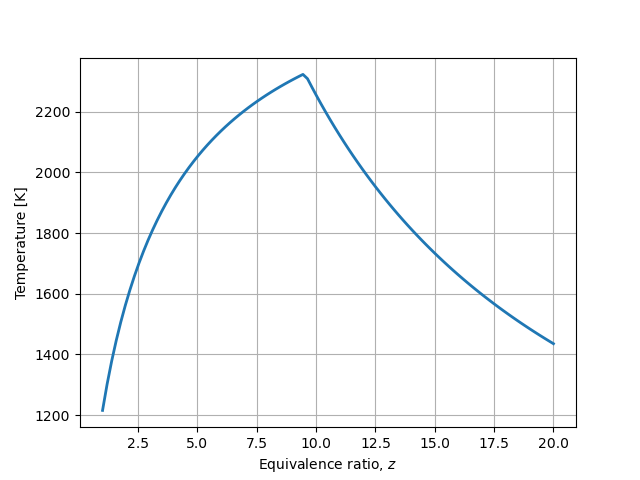

In [17]:
plt.plot(z, T_complete, label='complete combustion', lw=2)
plt.grid(True)
plt.xlabel('Equivalence ratio, $z$')
plt.ylabel('Temperature [K]');